# Data Exploration to understand  which Videos trend the longest

In [2]:
import pandas as pd
import matplotlib
from datapackage import Package
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from iso3166 import countries
import re

package = Package('https://datahub.io/core/country-list/datapackage.json')

# print list of all resources:
#print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        content = resource.read()
ISO_Alpha2_Country_Mapping = {item[1]:item[0] for item in content}
ISO_Alpha2_Country_Mapping['KR']='Korea' #From 'Korea, Republic of' to Korea

In [3]:
!source activate python38

This dataset consists of youtube trending videos and has the following columns. The video_id can have multiple entries as the same video can trend in more than one country

In [4]:
#import data into a dataframe
df=pd.read_pickle("../Data/Popularity_DF.pkl")
df.columns

Index(['video_id', 'viewing_country', 'Total_Trend_Days', 'Video_Title',
       'Publish_Time', 'PublishedAfter_in_Days', 'Origin_Country', 'Category',
       'Tags', 'Duration', 'Language', 'Views', 'Likes', 'Dislikes',
       'Comment_Count', 'Comments_Disabled', 'Ratings_Disabled',
       'Caption_Enabled', 'Video_Description', 'Blocked', 'Allowed',
       'Channel_Title', 'Channel_Description', 'Channel_PublishedAt',
       'Channel_Keywords', 'ChannelTopicCategories', 'GoogleAnalyticsUsed',
       'IsmoderatingComments'],
      dtype='object')

## Analyzing the top ten videos with the longest maximum trending time

In [5]:
#sorting dataframe by total trending days in decsending order
dfmax= df.sort_values(by="Total_Trend_Days", ascending=False)
#droping repeating entries for the trend time in each country so that we have the highest trend time for each unique video_id 
dfmax.drop_duplicates("video_id", inplace=True)

Creating a list of top ten longest trendinding videos

In [6]:
#Taking the top ten unique video_ids
dfmax10=dfmax.head(10)
topTitlesList= dfmax10["Video_Title"]
topTitlesList=topTitlesList.tolist()
topVideoIdList=dfmax10["video_id"]
topVideoIdList=topVideoIdList.tolist()
topTitlesList= [re.sub(' +', ' ',name)[0:40] for name in topTitlesList]

In [7]:
kylie=df[df["Video_Title"]=="To Our Daughter"]
topTitlesList[1]=topTitlesList[1]+" | "+kylie.iloc[0,8].split('|')[0]
topTitlesList

['Justin Timberlake’s FULL Pepsi Super Bow',
 'To Our Daughter | Kylie Jenner',
 'Jurassic World: Fallen Kingdom - Officia',
 '[OFFICIAL VIDEO] HAVANA - PENTATONIX',
 'Whethan, Dua Lipa - High (Audio)',
 'Maroon 5 - Wait',
 'Miguel - Come Through and Chill ft. J. C',
 'Incredibles 2 - Olympics Sneak Peek',
 'Rich Brian - Cold (Official Music Video)',
 'VENOM - Official Teaser Trailer (HD)']

There are 10 countries for which the trending data was collected to create this dataset. Creating a list of all the countries vidoes trend in, in this dataset

In [8]:
countryCodeList= df["viewing_country"].value_counts().index
countryCodeList=countryCodeList.tolist()

In [9]:
countryList = [ISO_Alpha2_Country_Mapping[cc] for cc in countryCodeList]
countryList

['Russian Federation',
 'Germany',
 'France',
 'Mexico',
 'Canada',
 'India',
 'Korea',
 'Japan',
 'United States',
 'United Kingdom']

Creating a 2D array that has video_id as the row No. and the each of the 10 countries as the columns. The values stored in the 2D array are total trending days that correspond to the video_id and the country that the video trended in. 

In [10]:
list1=[]
list2=[]
temp=[]
count=0
for videoid in topVideoIdList:
    dftemp= df[df["video_id"]==videoid]
    for country in countryCodeList:
        try:
            dftemp2=dftemp[dftemp["viewing_country"]==country]
            list2.append(int(dftemp2["Total_Trend_Days"]))
        except:
            list2.append(0)
    list1.append(list2)
    list2=[]

In [11]:
list1= np.array(list1)
list1

array([[ 2,  5,  5,  3,  6,  0,  0,  0,  4, 38],
       [ 2,  5,  4,  3,  6,  0,  1,  0, 10, 38],
       [ 2,  5,  3,  3,  6,  6,  2,  0, 10, 38],
       [ 1,  3,  2,  1,  5,  0,  2,  1, 13, 37],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 37],
       [ 1,  3,  2,  1,  5,  0,  1,  1, 10, 37],
       [ 0,  0,  1,  0,  4,  0,  0,  0, 17, 37],
       [ 0,  5,  4,  2,  7,  6,  5,  1, 11, 37],
       [ 0,  1,  1,  0,  4,  0,  0,  0,  0, 37],
       [ 0,  3,  3,  2,  5,  5,  2,  1, 10, 37]])

In [12]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(True)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    

    return im, cbar

### Creatimg a Heatmap to show the number of Total trending days for each Video in each Country

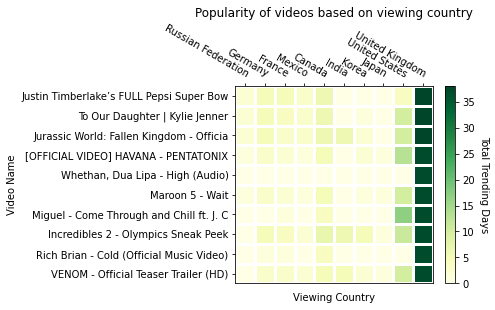

In [13]:
fig, ax = plt.subplots()

im, cbar = heatmap(list1, topTitlesList, countryList, ax=ax,
                   cmap="YlGn", cbarlabel="Total Trending Days")
#texts = annotate_heatmap(im)

fig.tight_layout()
plt.title("Popularity of videos based on viewing country")
plt.xlabel("Viewing Country")
plt.ylabel("Video Name")
plt.show()

### Approach:
* Created a list of all the 10 countries videos trend in.
* Created a list of the top ten video_ids that have the highest total number of trending days
* Used the list of video_ids and countries to generate a 2D array to store the number of days a video trends in each country.
* Generated a heatmap to represent the total number of trending days for each video in each of the countries 

### Insights:
* Each of the top longest trending videos have trended the longest in the UK
* The same videos that achieves such a high popularity in the UK by trending for 38 days only trends for 0 to 6 days in most other countries and in the US trends for about 10 to 20 days 
* There is a very large difference in the number of days videos trend in UK compared to other countries
* This raises the question do all occurrences of total trending days that are higher than 20 occur in UK ? If this is the case why does this happen?

## Further investigating the number of total trending days by Country

In [14]:
def gendata(sample,population):
    #population = stats.norm.rvs(size=1000, random_state=42)
    #sample = stats.norm.rvs(loc=loc, size=200, random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    #plt.figure(figsize=(6,6))
    plt.title("Comparing the number of days videos trend in UK vs other countries")
    plt.scatter(range(len(population)), population, label="other")
    plt.scatter(range(len(sample)), sample, label="UK")
    plt.legend(title="Viewing Country")

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    #plt.figure(figsize=(6,6))
    plt.hist(population, 20, density=True, alpha=0.7, label="other")
    plt.hist(sample, 20, density=True, alpha=0.7, label="UK")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend(title="Viewing Country")  
    
    return population, sample

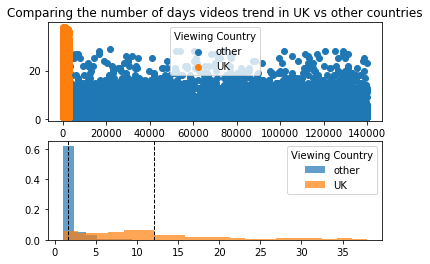

In [15]:
sample= df[df["viewing_country"]=="GB"]["Total_Trend_Days"]
population=df[df["viewing_country"]!="GB"]["Total_Trend_Days"]

population, sample= gendata(sample,population)

### Approach:
* Created a dataframe with all the rows that have viewing country set to GB 
* Created a dataframe with all the rows that don't have viewing country set to GB 
* Created a Scatter plot that has the row number as the x-axis and the total trending days as the y-axis. UK is represented by an orange color and all other countries are represented with the blue color
* Created a histogram plot that has the total trending days as the x-axis and frequency of occurrence as the y-axis. UK is represented by an orange color and all other countries are represented with the blue color

### Insights:
* All videos that trend longer than 29 days have trended in UK
* This is not a normal distribution so we cannot do a T-test to check whether there is a significant difference between the mean value of total trending days in UK verses the total trending days in other countries

In [16]:
dfmaxCountry= df.groupby("viewing_country")["Total_Trend_Days"].max()
dfmaxCountry.sort_values(ascending=False, inplace=True)
dfmaxCountry

viewing_country
GB    38
US    29
IN    10
CA     8
KR     7
DE     7
FR     5
RU     4
MX     4
JP     3
Name: Total_Trend_Days, dtype: int64

Text(0.5, 1.0, 'The longest videos trend in each country')

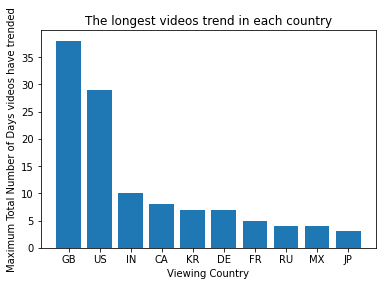

In [17]:
plt.bar(dfmaxCountry.index, dfmaxCountry)
plt.xlabel("Viewing Country")
plt.ylabel("Maximum Total Number of Days videos have trended")
plt.title("The longest videos trend in each country")


### Approach:
* Created a series that has the max value of total trending days for each country 
* Sorted the vales in the series in desending order and created a bar graph

### Insights:
* Videos trend in UK from 1 to 38 days
* Videos trend in US from 1 to 29 days
* Videos trend in India from 1 to 10 days
* Videos trend in Canada from 1 to 8 days
* Videos trend in all other countries for less than 8 days